## NYU Machine Learning final project Algo I - SVM - Scikit-learn Implementation

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import model_selection, svm, preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import style

### Import Data -- Iris (Dataset used in HW3)

In [3]:
import seaborn as sns
# Load Iris data from Seaborn 
# Imported as Pandas DataFrame
iris = sns.load_dataset('iris')
# Check the first five data 
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


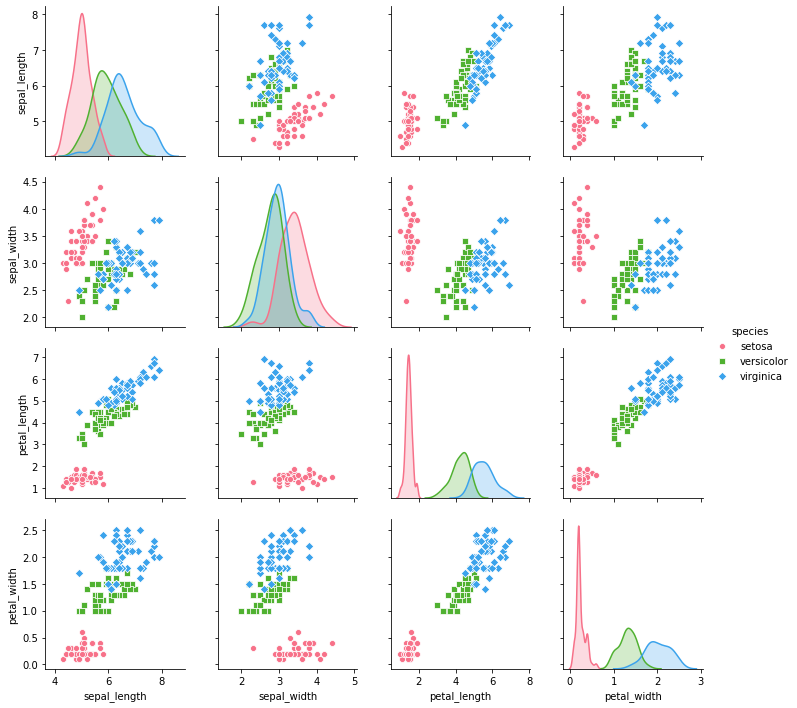

In [4]:
# Plot pairplot to see the distribution of the data
sns.pairplot(iris,hue='species',palette="husl",markers=["o", "s", "D"])

##### Observation of the data: 
We can see while **Setosa** is more likely to be **linearly separable** in 2-d space from the other two species, **Versicolor and Virginica** seem to have some overlaps in all features space: sepal_length sepal_width petal_length and petal_width. So from the observation of the data, we can indicate that soft margin SVM will have a better performance than hard margin SVM

In [5]:
from sklearn.model_selection import train_test_split
X = iris.drop('species',axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
print("Our training and test data shapes:")
print("x_train dim and type: ", X_train.shape)
print("y_train dim and type: ", y_train.shape)
print("x_test dim and type: ", X_test.shape)
print("y_test dim and type: ", y_test.shape)

Our training and test data shapes:
x_train dim and type:  (100, 4)
y_train dim and type:  (100,)
x_test dim and type:  (50, 4)
y_test dim and type:  (50,)


### Section 1 : Using scikit function that emulates the SVM done in class and running it on Iris Dataset

In hw9, we implemented the hard margin SVM finds the seperating decision bounary with the largest margin -- which means no data points are allowed in the margin areas.

We also tried to use quadratic problem solver to solve both primal and dual problem for hard margin SVM. 

In homework, we only ran the hard margin SVM on binary classification for data points. Let's exlpore how it would work for images. 

### Build hard margin SVM model using Sklearn

In [6]:
from sklearn import datasets, svm, metrics
import datetime as dt

**Explanination about Sklearn SVM's margin implementation**


>The plots below illustrate the effect the parameter C has on the separation line. A large value of C basically tells our model that we do not have that much faith in our data’s distribution, and will only consider points close to line of separation.

>A small value of C includes more/all the observations, allowing the margins to be calculated using all the data in the area.

>Reference: https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html

**In summary:**

**C is a regularization parameter for SVMs, it controls how much you want to punish your model for each misclassified point for a given curve. The lower the C parameters, the softer the margin.**

<img src="sklearn_svm_margin.png">

In [7]:
# Thus, for hard margin, we increase the regularization parameter of SVM to C = 1000
param_C = 1000
# Build model
classifier_hard_margin = svm.SVC(C=param_C,kernel ="linear")

start_time = dt.datetime.now()
print('Start learning at {}'.format(str(start_time)))
# Train model
classifier_hard_margin.fit(X_train, y_train)
end_time = dt.datetime.now() 
print('Stop learning {}'.format(str(end_time)))
elapsed_time= end_time - start_time
print('Elapsed learning {}'.format(str(elapsed_time)))


Start learning at 2020-05-05 17:46:09.934549
Stop learning 2020-05-05 17:46:09.936934
Elapsed learning 0:00:00.002385


In [8]:
# Get confusion matrix and accuracy: 
expected_hard_margin = y_test
predicted_hard_margin = classifier_hard_margin.predict(X_test)
print("Classification report for classifier %s:\n%s\n"
      % (classifier_hard_margin, metrics.classification_report(expected_hard_margin, predicted_hard_margin)))    
cm = metrics.confusion_matrix(expected_hard_margin, predicted_hard_margin)
print("Confusion matrix:\n%s" % cm)
print("Accuracy={}".format(metrics.accuracy_score(expected_hard_margin, predicted_hard_margin)))

Classification report for classifier SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50


Confusion matrix:
[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
Accuracy=0.98


**Cross validation**

Since we have a small dataset, it's fair to also use cross validation to check the accuracy 

In [13]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1000, random_state=40)
scores_hard = cross_val_score(clf, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_hard.mean(), scores_hard.std() * 2))

Accuracy: 0.97 (+/- 0.08)


**Accuracy sumary for hard margin SVM :**

**Accuracy classification score on test set: 0.98**

**Cross Validation accuracy score: 0.97 (+/- 0.08)**

### Section 2: Using scikit function that includes the suggested extension and running it on Iris Dataset


### Implement soft margin SVM
As we discussed in the hard margin, in Sklearn, the way to implement soft margin is to tune param_C to a smaller number, for thia data set, we **chose C=1.5** for soft margin

In [14]:
# For soft margin -> decrese the regularization parameter of SVM to C = 1.5
param_C =1.5
classifier_soft = svm.SVC(C=param_C,kernel='linear')

#We learn the digits on train part
start_time = dt.datetime.now()
print('Start learning at {}'.format(str(start_time)))
classifier_soft.fit(X_train, y_train)
end_time = dt.datetime.now() 
print('Stop learning {}'.format(str(end_time)))
elapsed_time= end_time - start_time
print('Elapsed learning {}'.format(str(elapsed_time)))

Start learning at 2020-05-05 17:47:33.454530
Stop learning 2020-05-05 17:47:33.457535
Elapsed learning 0:00:00.003005


In [15]:
# Get confusion matrix and accuracy: 
expected = y_test
predicted_soft = classifier_soft.predict(X_test)
print("Classification report for classifier %s:\n%s\n"
      % (classifier_soft, metrics.classification_report(expected, predicted_soft)))
      
cm = metrics.confusion_matrix(expected, predicted_soft)
print("Confusion matrix:\n%s" % cm)

print("Accuracy={}".format(metrics.accuracy_score(expected, predicted_soft)))

Classification report for classifier SVC(C=1.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50


Confusion matrix:
[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]
Accuracy=1.0


**Cross Validation for Soft margin**

In [16]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1.5, random_state=40)
scores_soft = cross_val_score(clf, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_soft.mean(), scores_soft.std() * 2))


Accuracy: 0.98 (+/- 0.03)


**Accuracy sumary for hard margin SVM :**

**Accuracy classification score on test set : 1.00**

**Cross Validation accuracy score: 0.98 (+/- 0.03)**

Text(0.5, 1.0, 'Improve in cross validation')

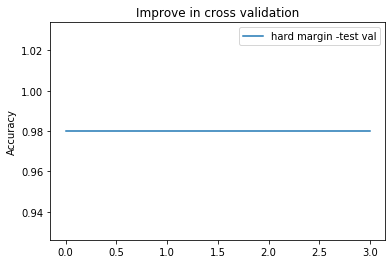

In [30]:
# Plot scores on Test set
from matplotlib import pyplot as plt
s_t = [0.98,0.98]
h_t = [1,0.98]
plt.plot(s_t,label='hard margin -test val')
# plt.plot([1.0],label='soft margin -test val')
plt.legend()
plt.ylabel("Accuracy")
plt.title("Improve in cross validation")

Text(0.5, 1.0, 'Improve in cross validation')

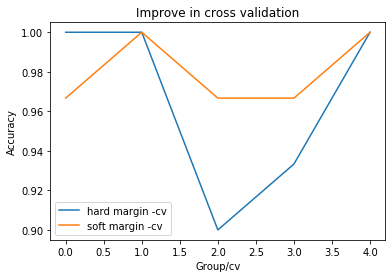

In [27]:
# Plot scores from corss validation 
from matplotlib import pyplot as plt
plt.plot(scores_hard,label='hard margin -cv')
plt.plot(scores_soft,label='soft margin -cv')
plt.legend()
plt.xlabel("Group/cv")
plt.ylabel("Accuracy")
plt.title("Improve in cross validation")

## Section 1&2 summary: ##
**Using Sklearn to implement hard margin and soft margin of SVM, We can see that Soft margin improved accuracy for 2% for our test set and improved for about 1% in average using cross validation.**